<center>
<h1><b>Mario Ferreyra | Emiliano Kokic</b></h1>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h3>Análisis y visualización de datos</h3>
</center>

# Resolucion de Tarea integradora - Parte 2

En esta notebook trabajeremos con variables aleatorias contínuas y distribuciones de probabilidad conocidas. En lugar de la librería pandas, utilizaremos scipy que también implementa numerosas funciones útiles para proceso de datos numéricos.

## Ejercicio 1

Desarrollar analíticamente el tiempo de vida en horas que una computadora funciona antes de descomponerse es una v.a.
continua con f.d.p. dada por

$$
f ( x ) = \begin{cases}
~~ 0 & si ~~ x<0 \\
~~ 0.01e^{-0.01*x} & si ~~ x ≥ 0
\end{cases}
$$

* Hallar la F.d.a. de X

Como X tiene distribucion exponencial: X ~ Exp($\lambda$)  
Notar que $\lambda$ = 0.01  
Su Funcion de Distribucion Acumulada esta dada por la siguiente ecuacion:

$$
F ( x ) = \begin{cases}
~~ 0 & si ~~ x < 0 \\
~~ 1 - e^{-0.01*x} & si ~~ x ≥ 0
\end{cases}
$$

* Esperanza: E(x) = $\beta$ = $\frac{1}{\lambda}$ = $\frac{1}{0.01}$ = 100
* Varianza: V(x) = $\beta^{2}$ = $\frac{1}{\lambda^{2}}$ = $\frac{1}{0.01^{2}}$ = 10000

* ¿Cuál es la probabilidad que la computadora funcione entre 50 y 150 horas antes de descomponerse?

P(50 ≤ x ≤ 150)  
= F(150) - F(50)  
= 1 - $e^{-0.01 * 150}$ - 1 + $e^{-0.01 * 50}$  
= - $e^{-1.5}$ + $e^{-0.5}$  
= $e^{-0.5}$ - $e^{-1.5}$  
= 0.3834004995642036

* ¿Cuál es la probabilidad que una computadora se descomponga antes de registrar 100 horas de uso?

__Explicacion:__ La probabilidad de que se descomponga antes de las 100 hs es lo mismo que el complemento de que funcione mas de 100 hs.  
Es decir, el complemento de P(x ≥ 100) = 1 - P(x ≤ 100)  .

P(x ≥ 100)  
= 1 - P(x ≤ 100)  
= 1 - F(100)  
= 1 - $e^{-0.01 * 100}$  
= 1 - $e^{-1}$  
= 0.6321205588285577  

## Ejercicio 2

Modificar los valores de mu, sigma y el rango de la siguiente distribución normal.  
Escribir un breve resumen sobre como se relacionan estas variables sobre el dibujo de la campana de Gauss.

In [1]:
%matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

# Define parameters for normal distribution.
mu = 0
sigma = 5
rng = range(-20, 30)
#mu = -50
#sigma = 50
#rng = range(-1000, 1000)

In [2]:
def graphic_normal(mu, sigma, rng, n_examples=10000):
    # Generate normal distribution with given mean and standard deviation.
    dist = norm(mu, sigma)

    plt.figure(figsize=(10,8))
    plt.subplot(311) # Creates a 3 row, 1 column grid of plots, and renders the following chart in slot 1.
    plt.plot(rng, dist.pdf(rng), 'r', linewidth=2)
    #plt.plot(rng, dist.pdf(rng), '-rD', linewidth=2, markevery=[mu - sigma, mu + sigma])
    plt.grid()
    plt.title('Probability density function of normal distribution')


    # Plot probability density function and of this distribution.
    plt.subplot(312)
    plt.plot(rng, dist.cdf(rng))
    plt.grid()
    plt.title('Cumulutative distribution function of normal distribution')

    # Draw 1000 samples from the random variable.
    sample = dist.rvs(size=n_examples)

    print("Sample descriptive statistics:")
    print(pd.DataFrame(sample).describe())

    # Plot a histogram of the samples.
    plt.subplot(313)
    plt.hist(sample, bins=100, normed=True)
    plt.plot(rng, dist.pdf(rng), 'r--', linewidth=2)
    plt.grid()
    plt.title('{} random samples from normal distribution'.format(n_examples))

    plt.tight_layout()  # Make space for titles 

Mu = 0
Sigma = 5
Rango = range(-20, 30)
Sample descriptive statistics:
                  0
count  10000.000000
mean      -0.033536
std        5.014315
min      -21.138776
25%       -3.390543
50%       -0.039946
75%        3.337843
max       18.945577


/home/mferreyra/.virtualenvs/diplodatos-ayv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


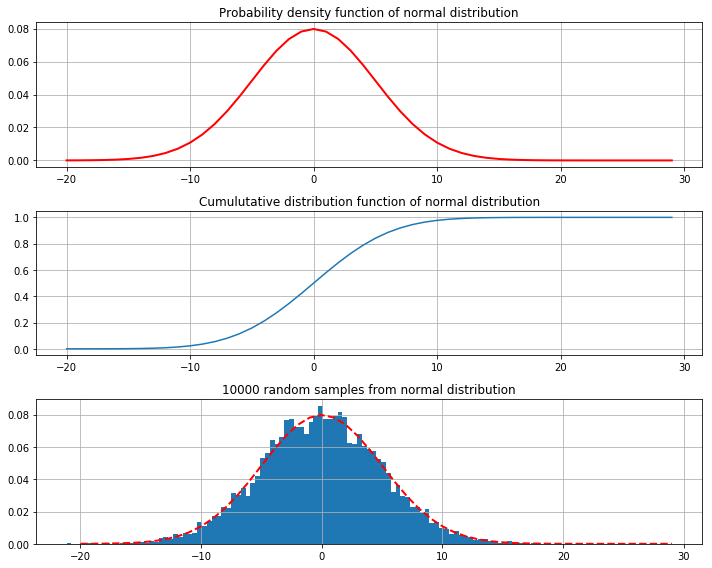

In [3]:
print("Mu = {}".format(mu))
print("Sigma = {}".format(sigma))
print("Rango = {}".format(rng))

graphic_normal(mu, sigma, rng)

Sea X un v.a. continua entonces diremos que tiene distribucion normal de parametros $\mu$ (con $\mu \in R$) y $\sigma^{2}$ (con $\sigma$ > 0)  

**Notacion:**  
X ~ N($\mu$, $\sigma^{2}$)  

**Proposicion:**  
X ~ N($\mu$, $\sigma^{2}$) $\longrightarrow$ $\frac{X - \mu}{\sigma}$ ~ N(0, 1)

**Propiedades:**
* $f$ es simetrica entorno a $\mu$, osea: $f(\mu - h) = f(\mu + h)$ para todo h $\in$ R
* $f$ tiene un punto maximo en $\mu$
* $f$ tiene dos puntos de inflexion en $(\mu - \sigma)$ y $(\mu + \sigma)$
* $\lim_{x \to -\infty}f(x) = \lim_{x \to +\infty}f(x)$ = 0
* Media, moda y mediana coinciden ($\mu$).  

**Otras:**
* Cuando $\mu$ varia, la grafica de la funcion se traslada sobre el eje x, es un parametro de posicion.
* Cuando $\sigma$ aumenta, la grafica se achata
* Cuando $\sigma$ disminuye, la grafica se hace mas puntiaguda (parametro de escala)
* Recordar que la desviacion estandar $\sigma$ es una medida de dispersion respecto a la media (o valor esperado $\mu$)
* El rango "rng" es en donde se graficaran tanto la f.d.p. como la f.d.a.

**NOTA:**
* Grafico 1: Funcion de densidad de probabilidad (f.d.p)  
$f(x) = \frac{e(\tfrac{-(x - \mu^2)}{2 * \sigma^2})}{\sqrt{2 * \pi * \sigma^2}}$

* Grafico 2: Funcion de distribucion acumulada (f.d.a)